# Coffee Lovers Unite!
If caffeine is one of the most popular drugs, then coffee is likely one of the most popular delivery systems for it. Aside from caffeine, people enjoy the wonderful variety of coffee-related drinks. Let’s do a rough investigation of the “market share” by two of the top coffee chains in the United States!

World Population Review provides some great data on store locations and chain prevalence. Check out this page for the Starbucks Coffee locations in the United States. Notice that this page only really gives the name of the state and the number of locations in that state.

# Scrape the Location Counts
1. Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:

Starbucks

Dunkin’ Donuts

2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [114]:
# import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from plotnine import *

### Scrape Starbucks Data

In [116]:
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_ = "wpr-table")

# scrape starbucks data

rows = []
states_list = []

# get state names and add to states list
for th in table.find_all("th")[4:]:
     states = th.get_text(strip = True)
     states_list.append(states)

for i, tr in enumerate(table.find_all("tr")[1:]):
    # iterate across states list to get corresponding state for each row
    state = states_list[i]

    # get all the rows in the dataset
    cells = tr.find_all("td")

    # get all 2023 stores
    stores2023_tag = cells[0].find("a") or cells[0]
    stores2023 = stores2023_tag.get_text(strip = True)
    
    #get all 2021 stores
    stores2021_tag = cells[1].find("a") or cells[1]
    stores2021 = stores2021_tag.get_text(strip = True)

    # get all 2024 stores
    stores2024_tag = cells[2].find("a") or cells[2]
    stores2024 = stores2024_tag.get_text(strip = True)

    # add columns to a list
    rows.append({
        "state" : state,
        "2023" : stores2023,
        "2021" : stores2021,
        "2024" : stores2024

    })

# convert to a dataframe
starbucks = pd.DataFrame(rows)

# clean and tidy data
starbucks_clean = starbucks.melt(id_vars = ["state"], var_name = "year", value_name = "store_count" )
starbucks_clean["location"] = "Starbucks"

starbucks_clean.head()

,state,year,store_count,location
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks


### Scrape Dunkin Data

In [118]:
# Dunkin Donuts

response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table", class_ = "wpr-table")

# scrape dunkin data

rows = []
states_list = []

# get state names and add to states list
for th in table.find_all("th")[3:]:
    states = th.get_text(strip = True)
    states_list.append(states)

for i, tr in enumerate(table.find_all("tr")[1:]):
    # iterate across states list to get corresponding state for each row
    state = states_list[i]

    # get all the rows in the dataset
    cells = tr.find_all("td")

    # get all 2024 stores
    stores2024_tag = cells[0].find("a") or cells[0]
    stores2024 = stores2024_tag.get_text(strip = True)

    # get all 2023 stores
    stores2023_tag = cells[1].find("a") or cells[1]
    stores2023 = stores2023_tag.get_text(strip = True)

    # add columns to a list
    rows.append({
        "state" : state,
        "2023" : stores2023,
        "2024" : stores2024

    })

# convert to a dataframe
dunkin = pd.DataFrame(rows)

# clean and tidy data
dunkin_clean = dunkin.melt(id_vars = ["state"], var_name = "year", value_name = "store_count")
dunkin_clean["location"] = "Dunkin"

dunkin_clean.head()


,state,year,store_count,location
0,New York,2023,"1,414",Dunkin
1,Massachusetts,2023,"1,068",Dunkin
2,Florida,2023,883,Dunkin
3,New Jersey,2023,866,Dunkin
4,Illinois,2023,692,Dunkin


In [119]:
# merge dunkin and starbucks datasets

merged_coffee = starbucks_clean.merge(dunkin_clean, on = ["state", "year", "location", "store_count"], 
how = "outer")

merged_coffee["year"] = merged_coffee["year"].astype(int)

merged_coffee.head()

,state,year,store_count,location
0,Alabama,2021,99,Starbucks
1,Alabama,2023,59,Dunkin
2,Alabama,2023,85,Starbucks
3,Alabama,2024,69,Dunkin
4,Alabama,2024,,Starbucks


# Supplemental Data
4. Scrape the state names and populations from this wikipedia page. Merge these data with your coffee dataset.

In [121]:

response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
soup = BeautifulSoup(response.content, "html.parser")

tables = soup.find_all("table", class_ = "wikitable")

#extract table
table = tables[0]

# scrape population data
rows = []

for tr in table.find_all("tr")[1:]:
    cells = tr.find_all("td")

    # get state values
    state_tag = cells[2].find("a") or cells[2]
    state = state_tag.get_text(strip = True)

    # get population values
    pop_tag = cells[3].find("a") or cells[3]
    population = pop_tag.get_text(strip = True)

    # append data
    rows.append({
        "state" : state,
        "population" : population
    })

# convert to a df
population = pd.DataFrame(rows)

# merge dataframes
merged_pop = merged_coffee.merge(population, on = "state", how = "left")
merged_pop["population"] = merged_pop["population"].str.replace(",", "").astype(int)

merged_pop.head()

,state,year,store_count,location,population
0,Alabama,2021,99,Starbucks,5024279
1,Alabama,2023,59,Dunkin,5024279
2,Alabama,2023,85,Starbucks,5024279
3,Alabama,2024,69,Dunkin,5024279
4,Alabama,2024,,Starbucks,5024279



5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

In [122]:
# scrape starbucks revenue table from website
response = requests.get("https://companiesmarketcap.com/starbucks/revenue/")
soup = BeautifulSoup(response.content, "html.parser")

table = soup.find("table")

rows = []

for tr in table.find_all("tr")[1:]:
    cells = tr.find_all("td")
    
    # get year values 
    year_tag = cells[0].find("a") or cells[0]
    year = year_tag.get_text(strip = True)

    # get revenue values
    revenue_tag = cells[1].find("a") or cells[1]
    revenue = revenue_tag.get_text(strip = True)

    # append rows
    rows.append({
        "year" : year,
        "revenue" : revenue
    })

# convert to a df
starbucks_revenue = pd.DataFrame(rows)

# remove unnecessary items in the columns
starbucks_revenue["year"] = starbucks_revenue["year"].str.replace("2024(TTM)", "2024").astype(int)
starbucks_revenue["revenue"] = starbucks_revenue["revenue"].str.replace("$","")
starbucks_revenue["revenue"] = starbucks_revenue["revenue"].str.replace(" B","").astype(float)

# add location column
starbucks_revenue["location"] = "Starbucks"

starbucks_revenue.head()


,year,revenue,location
0,2024,36.47,Starbucks
1,2023,36.68,Starbucks
2,2022,32.91,Starbucks
3,2021,30.36,Starbucks
4,2020,23.17,Starbucks


In [211]:
# create Dunkin Donuts df 
dunkin_revenue = pd.DataFrame({
    "year" :[2023, 2024],
    "revenue" : [1.4, 1.449],
    "location" : ["Dunkin"] * 2
})

# merge revenue data
merged_revenue = pd.concat([starbucks_revenue, dunkin_revenue], ignore_index=True)


In [128]:
# merge revenue data with merged coffee data
merged_rev_coffee = merged_pop.merge(merged_revenue, on = ["location", "year"], how = "left")

Based on the most recent years for which Dunkin' Donuts has reported annual revenue, we’ve observed an average growth rate of approximately 3.5%. Since specific information for Dunkin' Donuts' 2024 revenue isn’t currently available, we’ll use this 3.5% growth rate to estimate the revenue for 2024.

6. Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information.

In [147]:
# create region variable
regions_dict = {
    "Northeast" : ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont",
    "New Jersey", "New York", "Pennsylvania"],
    "Midwest" : ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", 
    "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South" : ["Delaware", "Maryland", "District of Columbia", "Alabama", "Arkansas", "Florida", 
    "Georgia", "Kentucky", "Louisiana", "Mississippi", "North Carolina", "South Carolina", "Tennessee", "Virginia", "West Virginia",
    "Oklahoma", "Texas"],
    "West": ["Arizona", "New Mexico", "Alaska", "California", "Hawaii", "Nevada", "Oregon", "Washington",
    "Colorado", "Idaho", "Montana", "Utah", "Wyoming"]
}

# create regions df
regions = pd.DataFrame([(state, region) for region, states in regions_dict.items() for state in states], 
                            columns=['state', 'Region'])

# merge df with dataset
all_data = merged_rev_coffee.merge(regions, on = "state", how = "left")
# fill NA values with zeros
all_data["store_count"] = pd.to_numeric(all_data["store_count"], errors='coerce')

all_data.head()

,state,year,store_count,location,population,revenue,Region
0,Alabama,2021,99.0,Starbucks,5024279,30.360,South
1,Alabama,2023,59.0,Dunkin,5024279,1.400,South
2,Alabama,2023,85.0,Starbucks,5024279,36.680,South
3,Alabama,2024,69.0,Dunkin,5024279,1.449,South
4,Alabama,2024,NaN,Starbucks,5024279,36.470,South


# Analyze
7. Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):

Are some of these chains more prevalent in certain states than others? Possibly despite having less stores overall? Same questions for regions instead of states.

How does your chosen financial metric change by state and region for each chain? For example, having 5 stores in California is very different from having 5 stores in Wyoming.

Does the distribution of each chain’s stores match population distribution, by both state/region?

Do the financial data match what you’d expect based on the number and locations of the stores? Why or why not?

## Bar Plot by Region and Year

The following plot displays the store counts of Dunkin' and Starbucks by region and year, allowing for direct comparisons between the two chains across different regions. both Starbucks and Dunkin' have established a strong presence in the South as of 2024, indicating that this region is a key market for both brands. However, Dunkin' minimal presence in the West, indicating potential challenges in increasing its market share in that region.

Throughout the observed years, we can see a steady increase in the number of stores for both chains, which suggests a growing demand for their offerings. However, there is a slight decline in Starbucks’ store counts in the West, hinting at possible shifting consumer preferences in that area. These trends highlight the evolving landscape of the coffee shop industry and the strategic challenges both Dunkin' and Starbucks must address to sustain their competitive advantages.

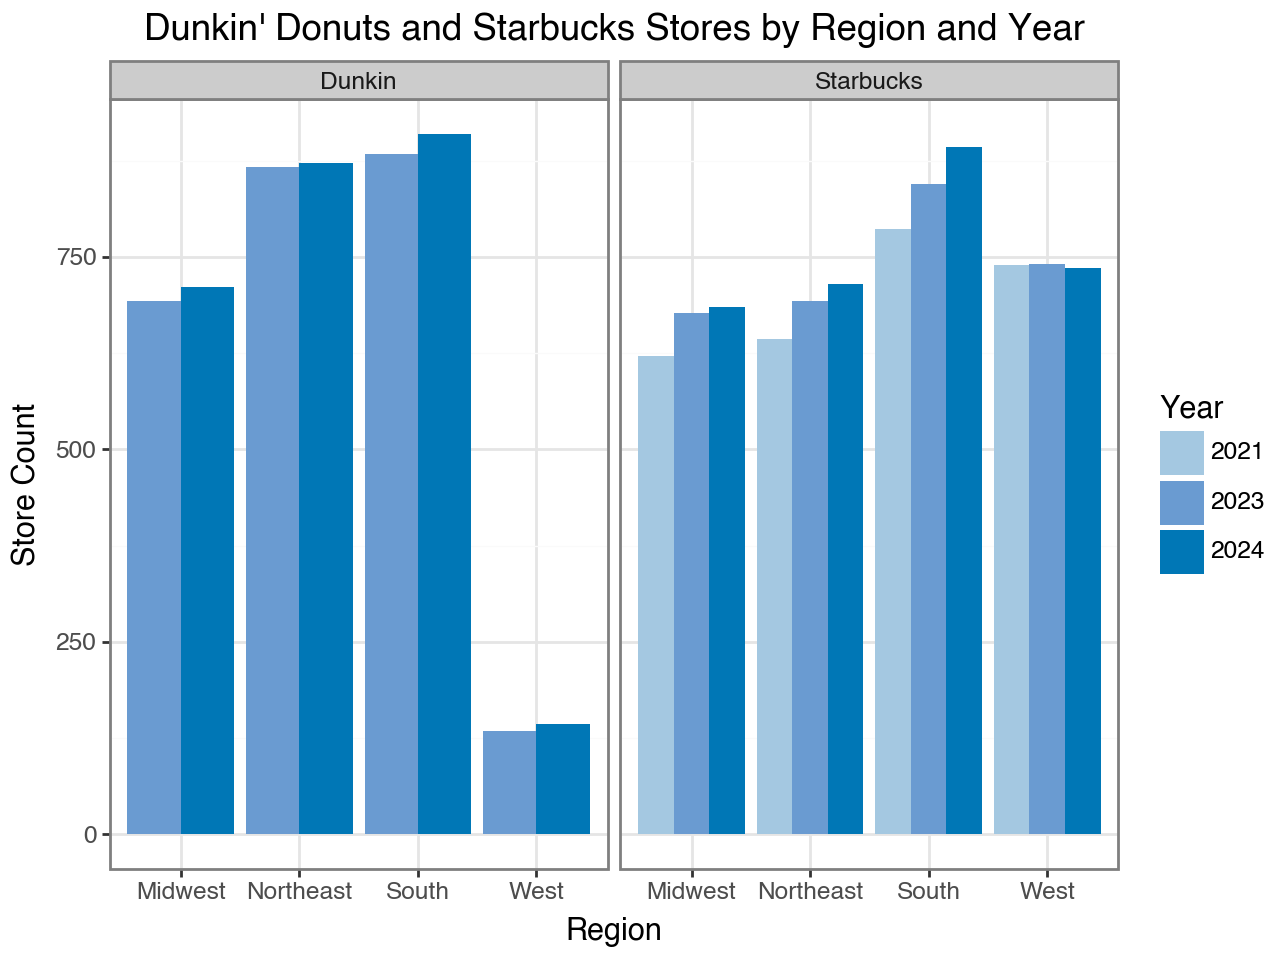

In [148]:
all_data_zeros = all_data.fillna(0)

(ggplot(all_data_zeros, aes(x='Region', y='store_count', fill='factor(year)'))
 + geom_bar(stat="identity", position="dodge") 
 + labs(x="Region", y="Store Count", 
        title="Dunkin' Donuts and Starbucks Stores by Region and Year", fill="Year")
 + scale_fill_manual(values=["#A4C8E1", "#6A9BD1", "#0077B6"]) 
 + facet_wrap("~ location") 
 + theme_bw()
)


## Scatter Plot of Store Count vs. Population

The plot illustrates the correlation between the number of stores and the population for both Starbucks and Dunkin'. Both chains exhibit a positive relationship, indicating that as population size increases, so does the number of stores. However, Dunkin' shows notable instances of high populations with low store counts, most likely on the West Coast, where its presence is limited. This trend suggests potential areas for expansion that could significantly boost Dunkin's revenue. Expanding into these populated areas might not just improve sales but also strengthen Dunkin’s overall position in the coffee shop market, making it a crucial step for future growth.

/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 53 rows containing missing values.


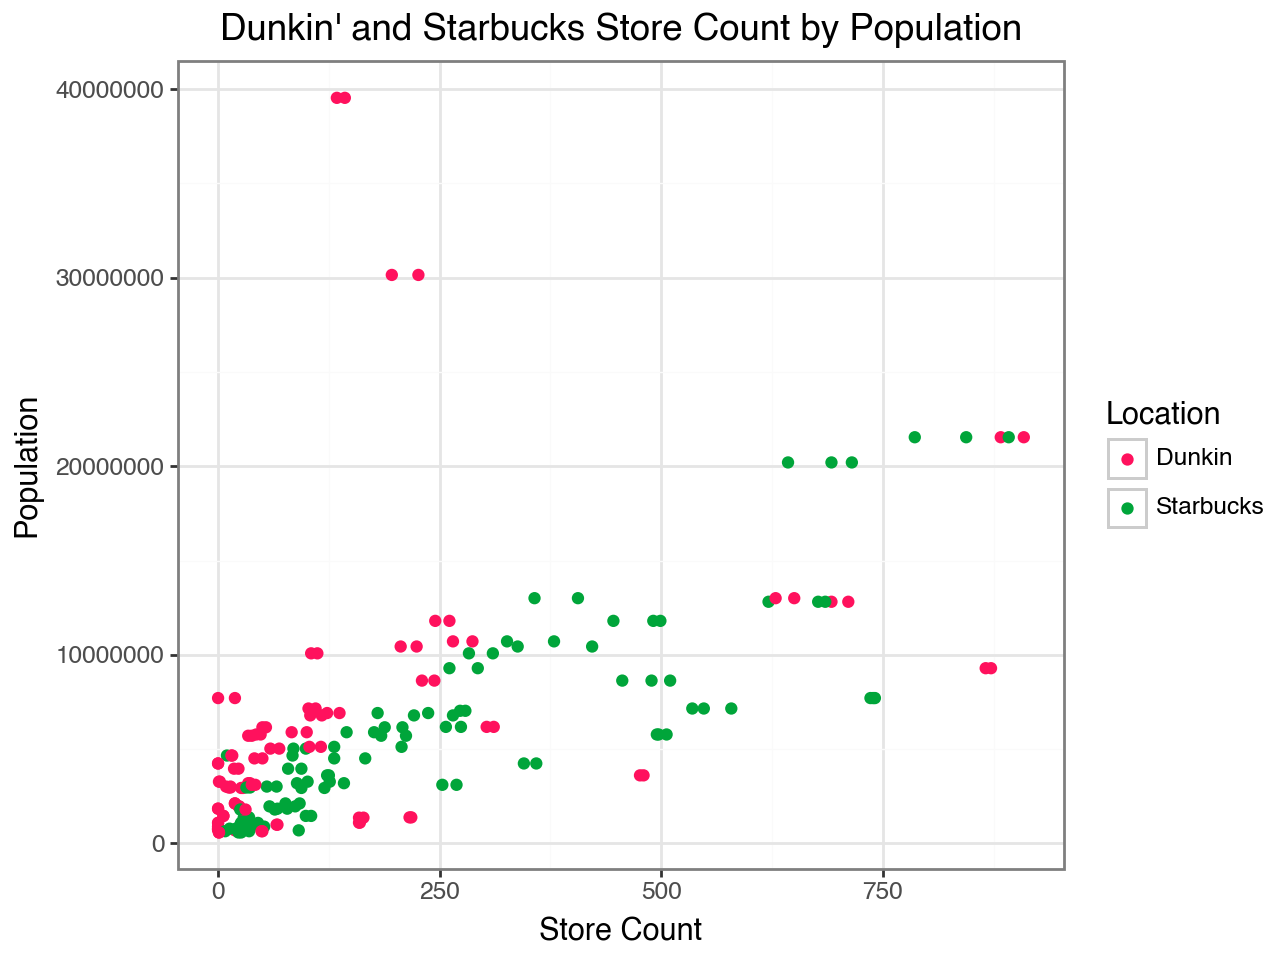

In [190]:
(ggplot(all_data, aes(x='store_count', y='population', color = "location"))
 + geom_point()
 + labs(x = "Store Count", y = "Population", 
        title = "Dunkin' and Starbucks Store Count by Population",
        color = "Location")
 + scale_color_manual(values=["#ff115d", "#00a53a"]) 
 + theme_bw()
)

## Box Plot for Store Count by Year

This plot illustrates the store counts of Dunkin' and Starbucks over the years, with the jitter plot showing individual store counts and point sizes reflecting state populations. Starbucks demonstrates a steady growth trajectory, highlighted by a significant increase in store counts in 2024, suggesting rising demand. In contrast, Dunkin' exhibits greater variability in its store counts and lower mean values in both 2023 and 2024 compared to Starbucks. This implies that while Starbucks is expanding rapidly to meet consumer needs, Dunkin' may need to adapt its strategy to enhance its competitive position in the market.

/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 53 rows containing non-finite values.


/Users/chloefeehan/.conda/envs/pythonProject/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 53 rows containing missing values.


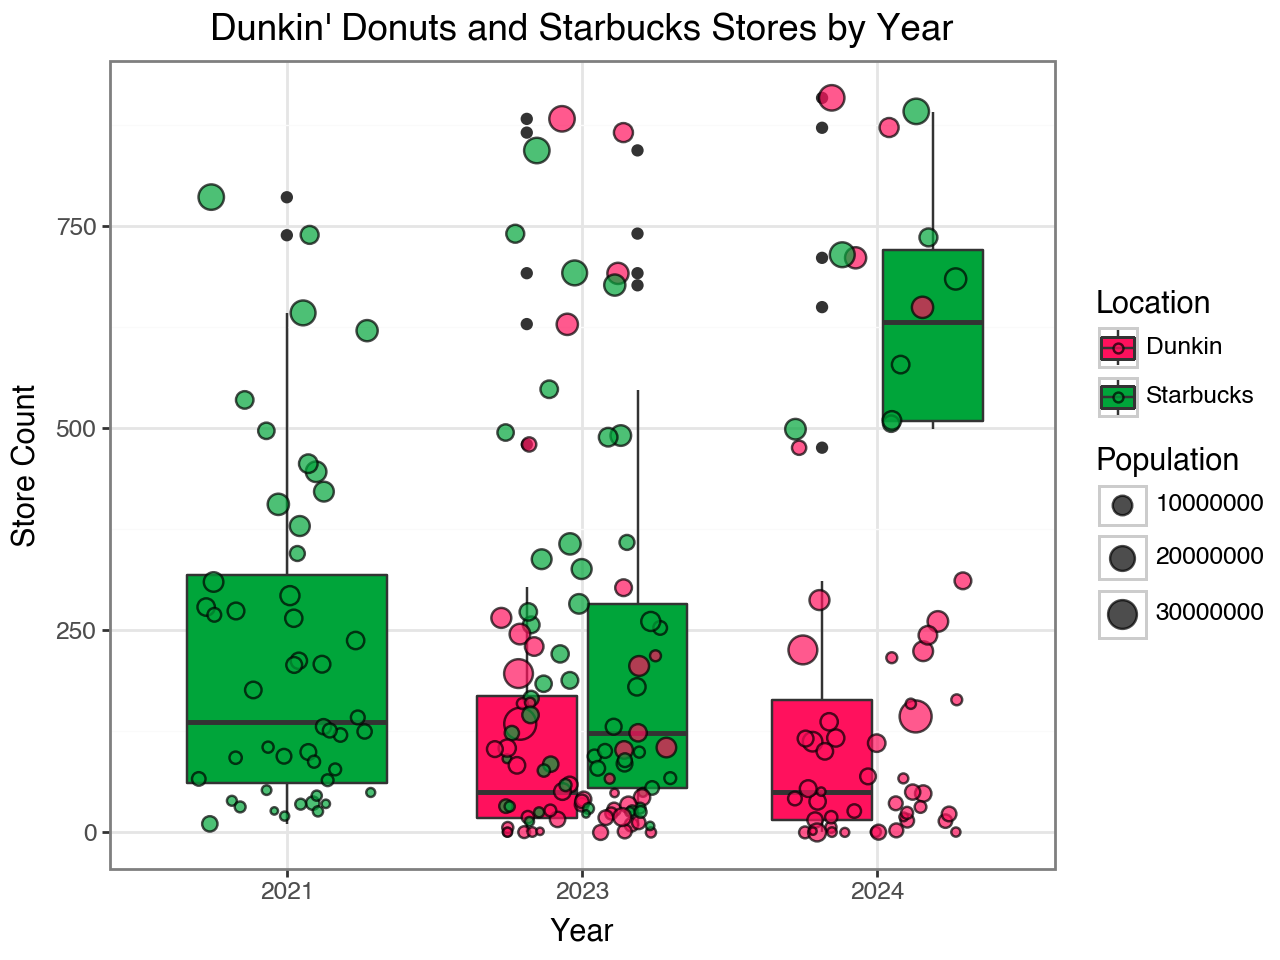

In [191]:
(ggplot(all_data, aes(x='factor(year)', y='store_count', fill='location'))
 + geom_boxplot(outlier_shape = None) 
 + geom_jitter(aes(size='population', fill = "location"), alpha=0.7, width=0.3)
 + labs(x="Year", y="Store Count", 
        title="Dunkin' Donuts and Starbucks Stores by Year", fill="Location", size = "Population")
 + scale_fill_manual(values=["#ff115d", "#00a53a"]) 
 + theme_bw()
)

## Yearly Revnue for Dunkin' and Starbucks

The plot depicting yearly revenue for Dunkin' and Starbucks showcases clear differences in their financial performance. Starbucks has seen substantial revenue growth from 2021 to 2023, followed by a minor decline in 2024. This suggests that Starbucks has effectively enhanced its market presence. However, the dip in 2024 might signal changes in consumer preferences that could impact future sales.

Dunkin's revenue remains significantly lower than Starbucks, with only a slight increase from 2023 to 2024. This indicates the competitive advantage Starbucks holds in the market, suggesting that Dunkin' may need to reassess its strategies to strengthen its position and keep pace with its rival.



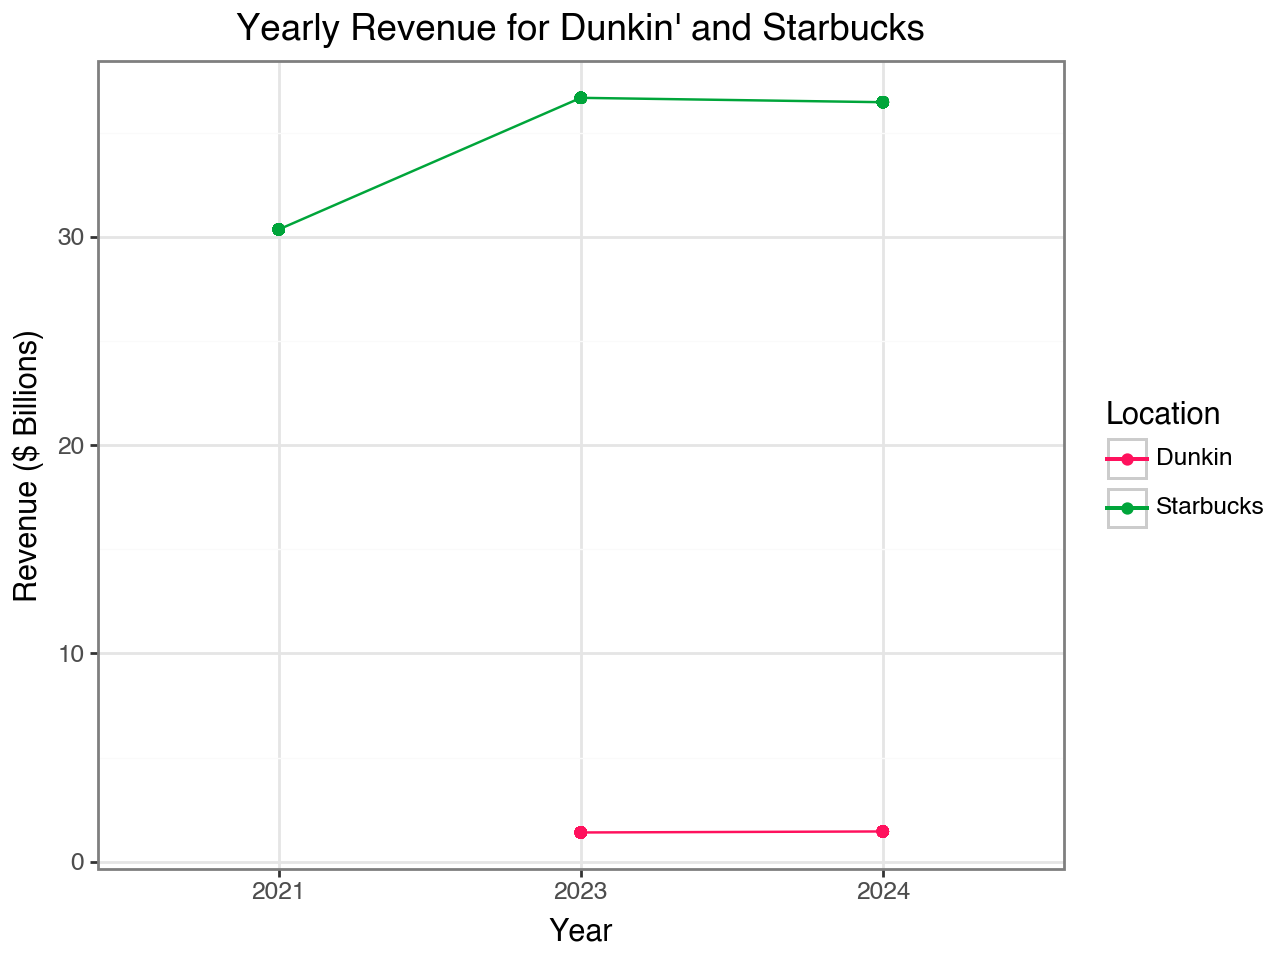

In [189]:
(ggplot(all_data, aes(x='factor(year)', y='revenue', color='location', group = "location"))
 + geom_point()
 + geom_line()
 + labs(x="Year", y="Revenue ($ Billions)", 
        title="Yearly Revenue for Dunkin' and Starbucks", color="Location")
 + scale_color_manual(values=["#ff115d", "#00a53a"]) 
 + theme_bw()
)

## Dunkin' Donuts and Starbucks Stores by State

The bar plot displays the five states with the highest store counts for Dunkin' and Starbucks. Florida is the leading state for both chains, with New Jersey in a close second for Dunkin' and Washington for Starbucks. This suggests a highly competitive market in Florida, where both brands have established a significant presence. The dominance of these chains in this state may reflect consumer demand and preferences, indicating potential opportunities for growth and marketing strategies tailored to the local market.

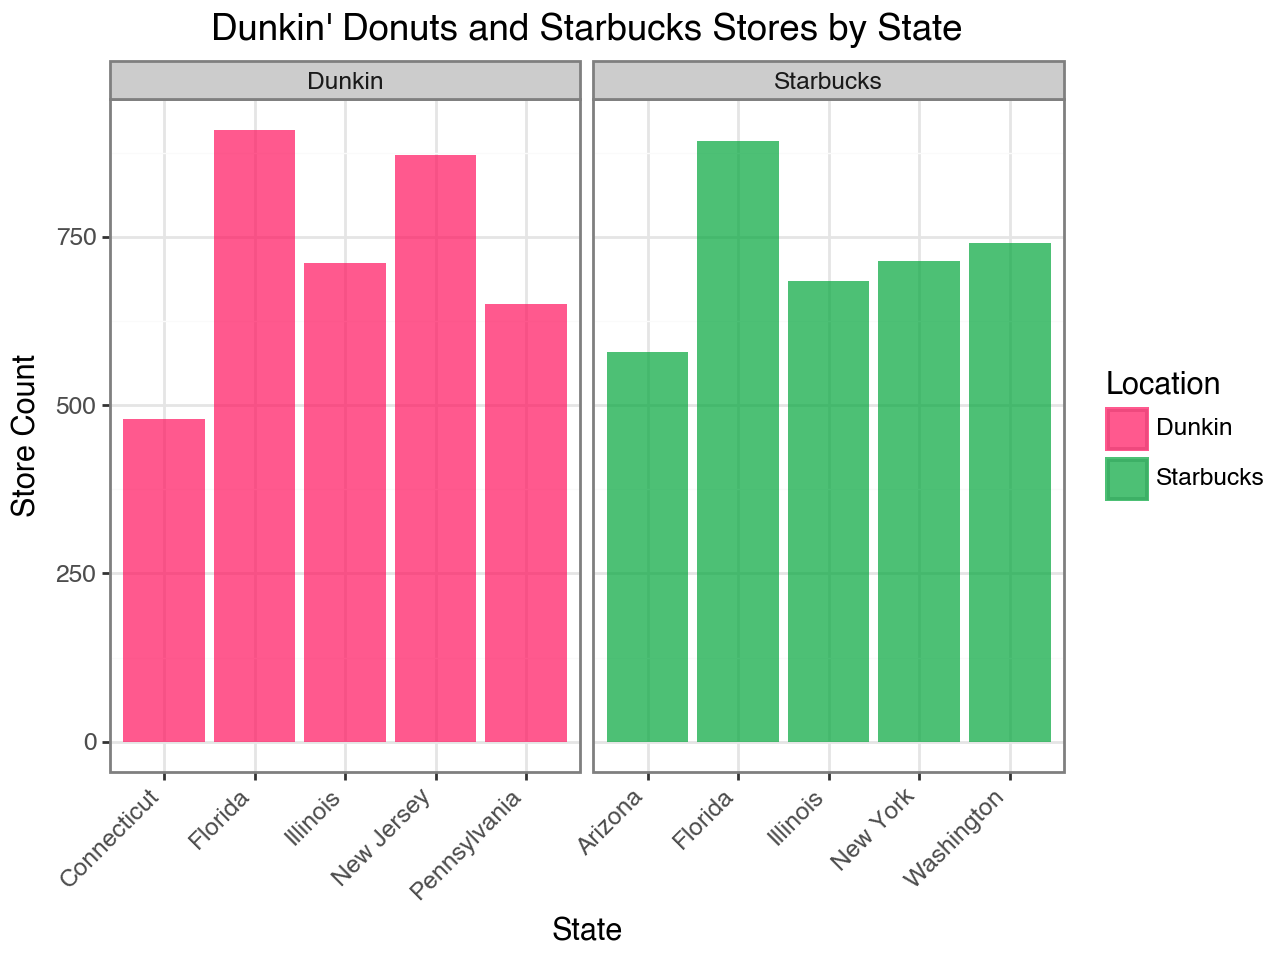

In [210]:
top_states = all_data.groupby(['state', 'location'], as_index=False)['store_count'].max().sort_values(by='store_count', ascending=False).groupby('location').head(5)

(ggplot(top_states, aes(x='state', y='store_count', fill='location'))
 + geom_bar(stat="identity", alpha = 0.7) 
 + labs(x="State", y="Store Count", 
        title="Dunkin' Donuts and Starbucks Stores by State", fill="Location")
 + scale_fill_manual(values=["#ff115d", "#00a53a"]) 
 + facet_wrap("~ location", scales='free_x') 
 + theme_bw()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

# Automate
Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should

Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.

In [192]:

def scrape_table(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # get table
    table = soup.find("table", class_ = "wpr-table")

    # create empty lists
    headers = []
    rows = []
    states_list = []

    # get headers
    for th in table.find_all("th", class_ = "datatable-th"):
        header = th.get_text(strip = True)
        headers.append(header)
    # get total number of headers to index from
    index = len(table.find_all("th", class_ = "datatable-th"))

    # get state names and add to states list
    for th in table.find_all("th")[index:]:
        states = th.get_text(strip = True)
        states_list.append(states)

    # iterate over each row 
    for i, tr in enumerate(table.find_all("tr")[1:]):
        # add state names to states list
        state = states_list[i]
        # get data from each row
        cells = tr.find_all("td")
        # create new dictionary with states
        row_data = {"State": states_list[i]}

        # iterate through each cell
        for j, cell in enumerate(cells):
                # get all text
                cell_tag = cell.find("a") or cell 
                # add it to the row_data, adjusting for the headers
                row_data[headers[j + 1]] = cell_tag.get_text(strip=True)

        # add to rows list
        rows.append(row_data)
    # convert to a df
    df = pd.DataFrame(rows)
    # make tidy df
    df_long = df.melt(id_vars = "State", var_name = "Year", value_name = "Count")

    # create new column with store name
    df_long["Store"] = df_long["Year"].apply(lambda x: x.split()[0]) 
    # search extract 4 digit year
    df_long["Year"] = df_long["Year"].apply(lambda x: re.search(r"(\d{4})", x).group(0))

    return df_long


In [193]:
#test function
url = "https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state"
scrape_table(url).head()


,State,Year,Count,Store
0,Texas,2024,489,Chick-Fil-A
1,Florida,2024,334,Chick-Fil-A
2,Georgia,2024,327,Chick-Fil-A
3,California,2024,243,Chick-Fil-A
4,North Carolina,2024,174,Chick-Fil-A


# Appendix and References

Generative AI Statement:

Generative AI was used primarily for troubleshooting errors and optimizing workflows in this lab. It suggested using the enumerate function to iterate more effectively, aiding in clearer code organization. Additionally, AI provided techniques for converting dictionaries directly into DataFrames, improving data processing efficiency. While constructing the function, AI support was especially helpful in transforming row_data into a dictionary format compatible with the states list.

Revenue data sources:

* Starbucks yearly revenue: https://companiesmarketcap.com/starbucks/revenue/

* Dunkin donuts yearly revenue: https://www.zippia.com/dunkin-donuts-careers-554008/revenue/

* Dunkin donuts growth rate: https://companiesmarketcap.com/dunkin-brands/revenue/ 

